<a href="https://colab.research.google.com/github/LongNguyen1984/DeepLearning/blob/master/PlotBlan_Atman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import gridspec

import seaborn as sns
import scipy.stats as st

import warnings
warnings.filterwarnings('ignore')

In [6]:
ba_df = pd.DataFrame({'Class':[], 'Ref':[],})

for m,c in zip([1,3,6],list('ABC')):
  temp = pd.DataFrame({'Class':list(c*100),
                       'Ref': np.random.gamma(m,0.5,100),
                       'Target': np.random.gamma(m,0.5,100) - np.random.gamma(m/2,1,100)})
  ba_df = pd.concat([ba_df, temp])

ba_df['Difference'] = ba_df['Target'] - ba_df['Ref']

ba_df

,Class,Ref,Target,Difference
0,A,0.135259,0.719251,0.583992
1,A,0.041699,-3.147344,-3.189044
2,A,0.849222,-0.805059,-1.654282
3,A,0.084980,0.222644,0.137664
4,A,0.252399,0.423729,0.171330
...,...,...,...,...
95,C,2.680721,0.986603,-1.694118
96,C,3.231299,-0.310933,-3.542232
97,C,3.589473,-1.475887,-5.065360
98,C,3.402574,-0.390504,-3.793078


In [7]:
ba_df.groupby('Class').describe(percentiles = [0.05,0.5,0.95])['Difference']


,count,mean,std,min,5%,50%,95%,max
Class,,,,,,,,
A,100.0,-0.461337,1.020073,-3.627352,-2.123913,-0.322295,0.850180,2.169829
B,100.0,-1.363477,1.683479,-6.465957,-4.476119,-1.215059,1.078863,2.157863
C,100.0,-2.973961,2.696700,-10.131785,-7.653065,-2.582053,0.900090,4.050394


In [8]:
# Kích thước font chữ
plt.rcParams.update({'font.size': 15})

# Thiết kế lưới biểu đồ 2x2, tỉ lệ rộng 3:1 và cao 1:3 dùng GridSpec:

gs = gridspec.GridSpec(2, 2, width_ratios=[3,1], height_ratios=[1,3])
gs.update(hspace=0.09, wspace=0.09)

# Tạo object biểu đồ kích thước 16x10, nền trắng

fig = plt.figure(figsize=(12,8))

fig.patch.set_facecolor('white')

# Tạo 2 phổ màu liên tục/rời rạc cho 3 phân nhóm
fill = ['Greens','YlOrRd','Reds'] 
edge = ['#73cc06', '#fcba03', '#fc035a']



<Figure size 864x576 with 0 Axes>

In [11]:
# Tính 3 trị số Median, phân vị 5 và 95 của Difference cho toàn quần thể
ba_stat = ba_df['Difference'].describe(percentiles = [0.05,0.5,0.95])[4:7].to_list()

# Xác định giới hạn trên và dưới của trục hoành, trục tung

xmin, xmax = min(ba_df['Ref'])-0.5, max(ba_df['Ref'])+0.5
ymin, ymax = min(ba_df['Difference'])-1, max(ba_df['Difference'])+1

Text(0.5, 0, 'Thang đo tham chiếu')

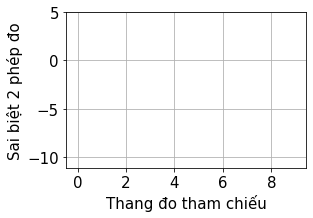

In [12]:
# Thiết kế hệ trục cho panel chính (2D KDE và tán xạ)
ax = plt.subplot(gs[1,0]) 
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.grid(True)

ax.set_ylabel('Sai biệt 2 phép đo')
ax.set_xlabel('Thang đo tham chiếu')

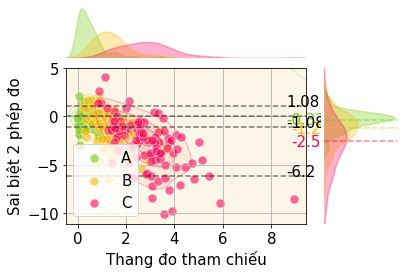

In [19]:
# Thiết kế hệ trục cho panel chính (2D KDE và tán xạ)
ax = plt.subplot(gs[1,0]) 
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.grid(True)

ax.set_ylabel('Sai biệt 2 phép đo')
ax.set_xlabel('Thang đo tham chiếu')
# Vẽ KDE plots

for s,fc,ec in zip(ba_df['Class'].unique(), fill, edge):
    x = ba_df[ba_df['Class'] == s]['Ref'].values
    y = ba_df[ba_df['Class'] == s]['Difference'].values
    n = len(x)

    # Ước tính kernel density 2D cho mỗi phân nhóm
    
    xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
    positions = np.vstack([xx.ravel(), yy.ravel()])
    values = np.vstack([x, y])
    kernel = st.gaussian_kde(values)
    f = np.reshape(kernel(positions).T, xx.shape)
    
    # Vẽ 2D KDE plot (lớp nền của panel chính)
    
    cfset = ax.contourf(xx, yy, f, levels=5, cmap = fc, alpha = 0.2, extend = 'neither')
    cset = ax.contour(xx, yy, f, colors = ec, levels=5, linewidths=0.5, alpha = 0.5)
    
    # Vẽ 2 1D KDE plot cho marginal distribution
    
    axl = plt.subplot(gs[0,0], sharex=ax) # Instantiate right KDE plot area
    axl.get_xaxis().set_visible(False) 
    axl.get_yaxis().set_visible(False)
    axl.spines["right"].set_visible(False)
    axl.spines["left"].set_visible(False)
    axl.spines["top"].set_visible(False)
    axl.spines["bottom"].set_visible(False)
    
    axb = plt.subplot(gs[1,1], sharey=ax) # Instantiate top KDE plot area
    axb.get_xaxis().set_visible(False) # Hide tick marks and spines
    axb.get_yaxis().set_visible(False)
    axb.spines["right"].set_visible(False)
    axb.spines["left"].set_visible(False)
    axb.spines["top"].set_visible(False)
    axb.spines["bottom"].set_visible(False)
    
    # Trục tung
    axb = sns.kdeplot(y, 
                      ax = axb, 
                      color = ec, 
                      shade = True, 
                      alpha = 0.3,
                      vertical = True)
    # trục hoành
    axl = sns.kdeplot(x, 
                      ax = axl, 
                      color = ec, 
                      alpha = 0.3,
                      shade = True, 
                      vertical = False)
    
# Vẽ biểu đồ tán xạ, hiển thị trị số thống kê

for s,ec in zip(ba_df['Class'].unique(), edge):
    x = ba_df[ba_df['Class'] == s]['Ref'].values
    y = ba_df[ba_df['Class'] == s]['Difference'].values
    
    xm = np.median(x)
    ym = np.median(y)
    
    # Trị số cho quần thể
    ax.text(xmax + 0.2, ym, f'{ym:.3}', 
            ha='center', 
            va='center',
            color= ec)
    
    axb.hlines(y = ym, xmin = 0, xmax=0.5,
         linestyles = 'dashed',
         alpha = 0.5,
         color = ec)
    
    # Biểu đồ tán xạ
    sns.scatterplot(x,y,
                ax = ax, 
                alpha = 0.6, 
                color = ec, 
                s = 80,
                label = s)
# Legend panel chính
ax.legend(loc = 'lower left')

ax.hlines(y = ba_stat + [0],
          xmin = xmin, 
          xmax = xmax,
         linestyles = 'dashed',
         alpha = 0.5)

# Trị số cho phân nhóm
for i in ba_stat:
    ax.text(x = xmax - 0.8, 
            y = i,
            s = f'{i:.3}',
            color='k')
    
plt.show()
